# Data Wrangling

Dealing with messy data.

* Google is your best friend.

## Jupyter Notebooks

### Helpful shortcuts

* Ctrl + Enter: run current cell
* Shift + Enter: run current cell and proceed
* Tab: autocomplete


## Python

Libraries needed:
* numpy
* pandas
* matplotlib

In [14]:
import numpy as np
import pandas as pd
import pylab as pl
from IPython.display import display, HTML

## The MovieLens data

http://grouplens.org/datasets/movielens/

Example inspired by Verena Kaynig-Fittkau & [Greg Reda](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/)

We start by loading the [users](http://files.grouplens.org/datasets/movielens/ml-100k/u.user), [ratings](http://files.grouplens.org/datasets/movielens/ml-100k/u.data), and [movies](http://files.grouplens.org/datasets/movielens/ml-100k/u.item) data

In [8]:
# Load the users data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
        'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
        sep='|', names = u_cols)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
# Load the ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
# Load movies data

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

#movies = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep='|')
movies = pd.read_csv( 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
                     sep='|', names=m_cols, usecols=range(5), encoding = 'latin1')

movies.head()


,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


## Get info about the data

In [17]:
display(movies.describe())
# *** Why only those two columns? ***
print ("---")
display (ratings.describe())
print ("---")
display (users.describe())
movies.dtypes

,movie_id,video_release_date
count,1682.000000,0.0
mean,841.500000,NaN
std,485.695893,NaN
min,1.000000,NaN
25%,421.250000,NaN
50%,841.500000,NaN
75%,1261.750000,NaN
max,1682.000000,NaN


---


,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


---


,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

## Merging data


In [18]:
# create one merged DataFrame

movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [19]:
display(movie_ratings.head())
display(users.head())
display(lens.head())

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [17]:
display(lens.describe())

,movie_id,video_release_date,user_id,rating,unix_timestamp,age
count,100000.000000,0.0,100000.00000,100000.000000,1.000000e+05,100000.000000
mean,425.530130,NaN,462.48475,3.529860,8.835289e+08,32.969850
std,330.798356,NaN,266.61442,1.125674,5.343856e+06,11.562623
min,1.000000,NaN,1.00000,1.000000,8.747247e+08,7.000000
25%,175.000000,NaN,254.00000,3.000000,8.794487e+08,24.000000
50%,322.000000,NaN,447.00000,4.000000,8.828269e+08,30.000000
75%,631.000000,NaN,682.00000,4.000000,8.882600e+08,40.000000
max,1682.000000,NaN,943.00000,5.000000,8.932866e+08,73.000000


## Selecting data

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [18]:
display(users.head())
print(' -'*10)
display(users['occupation'].head())


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


 - - - - - - - - - -


0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [19]:
# Selecting more than one column
columns_you_want = ['occupation', 'sex'] 
display(users[columns_you_want].head())


,occupation,sex
0,technician,M
1,other,F
2,writer,M
3,technician,M
4,other,F


In [22]:
display(users.head())
display(users.iloc[3])

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object

In [21]:
# "values" gives you access to the data directly
display( users.head().values)

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       [4, 24, 'M', 'technician', '43537'],
       [5, 33, 'F', 'other', '15213']], dtype=object)

In [43]:
print users.values[1:3]

[[2 53 'F' 'other' '94043']
 [3 23 'M' 'writer' '32067']]


## Filtering data

In [20]:
# Show users over 18
adultUsers = users[users.age > 18]
display( adultUsers.head())


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [31]:
# Show teenagers
teenUsers = users[(users.age >= 13) & (users.age<20)]
display( teenUsers.head())

,user_id,age,sex,occupation,zip_code
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904


## Split-apply-combine

* splitting the data into groups based on some criteria
* applying a function to each group independently
* combining the results into a data structure

<img src=http://i.imgur.com/yjNkiwL.png></img>

### Example: Find Diligent Users

* split data per user ID
* count ratings
* combine result

We'll use [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html])

In [32]:
# recall ratings
display(ratings.head())
print ("-----")
ratings_196 = ratings[ratings.user_id == 196]
display(ratings_196.head())
print ("-----")
display(ratings_196.count())
print ("-----")
display(ratings_196.values.shape)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


-----


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
940,196,393,4,881251863
1133,196,381,4,881251728
1812,196,251,3,881251274
1896,196,655,5,881251793


-----


user_id           39
movie_id          39
rating            39
unix_timestamp    39
dtype: int64

-----


(39, 4)

In [33]:
## split data
grouped_data = ratings.groupby('user_id')
#grouped_data = ratings['movie_id'].groupby(ratings['user_id'])
groups = grouped_data.groups

In [34]:
#print (groups.keys())
display(groups[1])

display(ratings['user_id'].iloc[groups[196]])

Int64Index([  202,   305,   333,   334,   478,   639,   687,   820,   933,
              972,
            ...
            88021, 88259, 88262, 88893, 89876, 92049, 92487, 94019, 96699,
            99073],
           dtype='int64', length=272)

0        196
940      196
1133     196
1812     196
1896     196
2374     196
6910     196
7517     196
7842     196
10017    196
10254    196
10981    196
13733    196
14606    196
16834    196
17102    196
17830    196
18853    196
21605    196
22271    196
22773    196
23189    196
24030    196
25726    196
32721    196
33536    196
35197    196
36281    196
41539    196
42384    196
50147    196
52726    196
56628    196
59165    196
59607    196
60199    196
60706    196
78787    196
87863    196
Name: user_id, dtype: int64

In [35]:
## count and combine
ratings_per_user = grouped_data.count()

display(ratings_per_user.head(5))

,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


In [36]:
# Lets check it out
print (ratings['user_id'][ratings.user_id == 1].count())

272


## Sorting

What are the most rated movies?

In [37]:
display(lens.title.head())
display(lens.title.value_counts().head(10))

0         Toy Story (1995)
1        Get Shorty (1995)
2           Copycat (1995)
3    Twelve Monkeys (1995)
4              Babe (1995)
Name: title, dtype: object

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [38]:
sorted_lens = lens.groupby(['movie_id', 'title']).size().sort_values(ascending=False)
display(sorted_lens.head(10))

movie_id  title                        
50        Star Wars (1977)                 583
258       Contact (1997)                   509
100       Fargo (1996)                     508
181       Return of the Jedi (1983)        507
294       Liar Liar (1997)                 485
286       English Patient, The (1996)      481
288       Scream (1996)                    478
1         Toy Story (1995)                 452
300       Air Force One (1997)             431
121       Independence Day (ID4) (1996)    429
dtype: int64

## Binning

Sometimes you want to assign bins to data.

In [39]:
# Lets create age groups

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
users['age_group'] = pd.cut(users.age, range(0, 81, 10), right=False, labels=labels)
display(users[['age', 'age_group']].drop_duplicates().head(10))
display(users.head(10))

,age,age_group
0,24,20-29
1,53,50-59
2,23,20-29
4,33,30-39
5,42,40-49
6,57,50-59
7,36,30-39
8,29,20-29
10,39,30-39
11,28,20-29


,user_id,age,sex,occupation,zip_code,age_group
0,1,24,M,technician,85711,20-29
1,2,53,F,other,94043,50-59
2,3,23,M,writer,32067,20-29
3,4,24,M,technician,43537,20-29
4,5,33,F,other,15213,30-39
5,6,42,M,executive,98101,40-49
6,7,57,M,administrator,91344,50-59
7,8,36,M,administrator,05201,30-39
8,9,29,M,student,01002,20-29
9,10,53,M,lawyer,90703,50-59


## Passing a function

You can create your own functions and apply them on data!

In [40]:
#grouped_data = ratings.groupby('user_id')

In [41]:
average_ratings = grouped_data.apply(lambda f: f.mean())
display( average_ratings.head())

,user_id,movie_id,rating,unix_timestamp
user_id,,,,
1,1.0,136.500000,3.610294,8.773916e+08
2,2.0,249.500000,3.709677,8.886204e+08
3,3.0,318.814815,2.796296,8.892372e+08
4,4.0,291.041667,4.333333,8.920028e+08
5,5.0,291.291429,2.874286,8.762081e+08


## Pivoting

A pivot table is a table that summarizes data in another table, and is made by applying an operation such as sorting, averaging, or summing to data in the first table, typically including grouping of the data.

Let's calculate the mean rating for men and women for each film.

In [42]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [43]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


## Plotting and data exploration

We will use matplotlib (or pylab).

,user_id,age,sex,occupation,zip_code
age_group,,,,,
0-9,1,1,1,1,1
10-19,76,76,76,76,76
20-29,332,332,332,332,332
30-39,241,241,241,241,241
40-49,168,168,168,168,168
50-59,94,94,94,94,94
60-69,27,27,27,27,27
70-79,4,4,4,4,4


(8, 5)


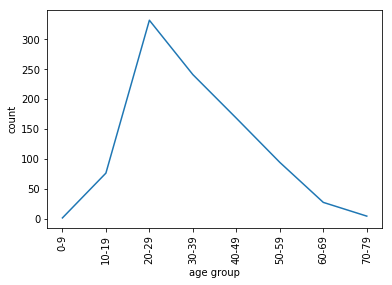

In [44]:
# Number of people per age group

age_group = users.groupby("age_group").count()
display(age_group)
print(age_group.shape)
pl.clf()
pl.plot(np.arange(age_group.shape[0]), age_group.user_id)
pl.xticks(np.arange(age_group.shape[0]), labels, rotation='vertical')
pl.xlabel("age group")
pl.ylabel("count")
pl.show()


But we basically created a histogram!

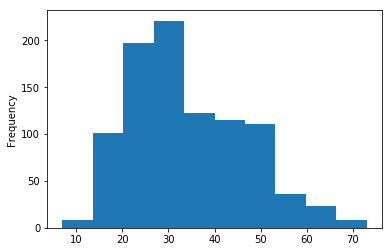

In [50]:
users['age'].plot(kind='hist')
pl.show()

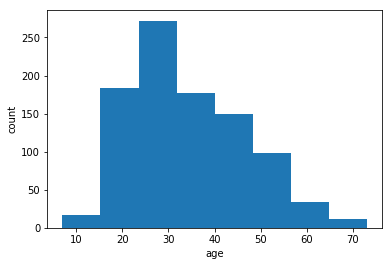

In [52]:
pl.clf()
pl.hist(users.age, bins = 8)
pl.xlabel("age")
pl.ylabel("count")
pl.show()

Let's check how well are movies rated.

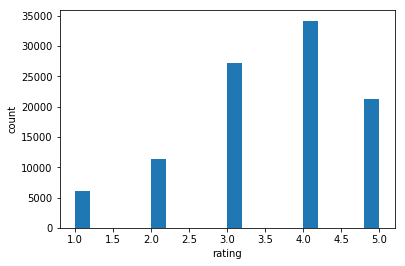

In [51]:
pl.clf()
pl.hist(ratings.rating, bins = 20)
pl.xlabel("rating")
pl.ylabel("count")
pl.show()

Ratings for Toy Story

In [52]:
display(movies[movies["title"].str.contains("Toy Story")])

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...


count    452.000000
mean       3.878319
std        0.927897
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

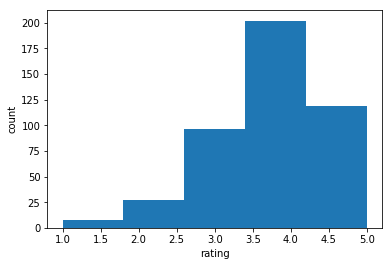

In [53]:
display(ratings[ratings.movie_id == 1].rating.describe())

pl.clf()
pl.hist(ratings[ratings.movie_id == 1].rating, bins = 5)
pl.xlabel("rating")
pl.ylabel("count")
pl.show()

Ratings per age group

In [60]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [62]:
by_age = lens.groupby("age")
display(by_age.rating.describe().head())

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
7,43.0,3.767442,0.996116,1.0,3.0,4.0,4.0,5.0
10,31.0,3.387097,1.520470,1.0,2.0,4.0,5.0,5.0
11,27.0,2.925926,1.071517,1.0,2.0,3.0,4.0,5.0
13,497.0,3.470825,1.110640,1.0,3.0,4.0,4.0,5.0
14,264.0,3.375000,1.574361,1.0,2.0,4.0,5.0,5.0


#### WARNING!!!! the follows takes a lot of time

In [56]:
# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['age_group'],
                           values='rating',
                           fill_value=-1)
display(pivoted.head())

,age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
movie_id,title,,,,,,,,
1,Toy Story (1995),-1,3.621622,3.920635,4.033058,3.700000,3.758621,3.4,5.0
2,GoldenEye (1995),3,3.181818,3.151515,3.333333,3.400000,2.333333,3.0,-1.0
3,Four Rooms (1995),-1,3.400000,3.169811,2.153846,3.250000,2.600000,-1.0,-1.0
4,Get Shorty (1995),-1,3.733333,3.625000,3.409836,3.478261,3.466667,4.0,3.5
5,Copycat (1995),-1,3.400000,3.243243,3.333333,3.285714,3.333333,3.5,-1.0


8


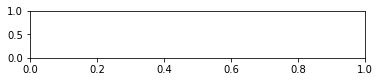

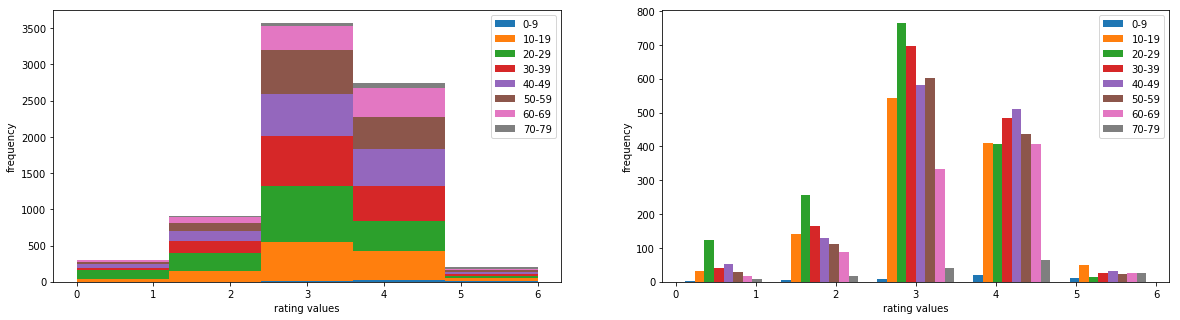

In [57]:
ratings_age = [pivoted.values[:, i] for i in range(8)]
print(len(ratings_age))
pl.figure(figsize=(20,5))
pl.subplot(121)
pl.hist(ratings_age, label = labels, bins = 5, range = [0, 6],
       histtype = "barstacked")
pl.xlabel('rating values')
pl.ylabel('frequency')
pl.legend(loc = "best")
pl.subplot(122)
pl.hist(ratings_age, label = labels, bins = 5, range = [0, 6])
pl.legend(loc = "best")
pl.xlabel('rating values')
pl.ylabel('frequency')
pl.show()

In [58]:
a = pl.figure()
for i in range(8):
    t = int(str(42)+str(i+1))
    pl.subplot(t)
    pl.hist(ratings_age[i], label = labels[i], bins = 5, range = [0, 6],
           normed = True)
    pl.legend(loc = "best")
pl.show()

/home/brabbit/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: num must be 1 <= num <= 4, not 5